# Part I: Applying Image Processing Filters For Image Cartoonifying

In [5]:
import cv2
import matplotlib.pyplot as plt

In [6]:
def find_edges(img):
    plt.figure(figsize=(5, 5))  
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) 
    plt.title('Original Image')
    plt.show()

    plt.figure(figsize=(25, 8))  
    
    grayscale = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    plt.subplot(1, 4, 1)
    plt.imshow(grayscale,cmap='gray') 
    plt.title('Grayscale Image')
    
    denoised = cv2.medianBlur(grayscale, 7)
    plt.subplot(1, 4, 2)
    plt.imshow(denoised, cmap='gray')
    plt.title('Denoised Grayscale Image')
   
    laplacian = cv2.Laplacian(denoised,cv2.CV_8U,ksize=5)
    plt.subplot(1, 4, 3)
    plt.imshow(laplacian,cmap='gray')
    plt.title('Laplacian Edge Detection')
    
    #_, edges = cv2.threshold(laplacian, 20, 255, cv2.THRESH_BINARY_INV )
    _, edges = cv2.threshold(laplacian, 0, 255, cv2.THRESH_BINARY_INV | cv2.THRESH_OTSU )
    
    plt.subplot(1, 4, 4)
    plt.imshow(edges,cmap='gray')
    plt.title('Binary Threshold')
    plt.show()
    return edges

In [7]:
'''
def create_laplacian_pyramid(image, num_levels):
    if image.shape[0] % 2 != 0:
        image = cv2.resize(image, (image.shape[1], image.shape[0]+1))
    pyramid = []
    for _ in range(num_levels):
        blurred = cv2.pyrDown(image)
        upscaled = cv2.pyrUp(blurred)
        level = image - upscaled
        pyramid.append(level)
        image = blurred
    pyramid.append(image)  # Add the smallest image
    return pyramid

def reconstruct_image(pyramid):
    reconstructed = pyramid[-1]
    for level in reversed(pyramid[:-1]):
        upscaled = cv2.pyrUp(reconstructed)
        reconstructed = upscaled + level
    return reconstructed
'''

'\ndef create_laplacian_pyramid(image, num_levels):\n    if image.shape[0] % 2 != 0:\n        image = cv2.resize(image, (image.shape[1], image.shape[0]+1))\n    pyramid = []\n    for _ in range(num_levels):\n        blurred = cv2.pyrDown(image)\n        upscaled = cv2.pyrUp(blurred)\n        level = image - upscaled\n        pyramid.append(level)\n        image = blurred\n    pyramid.append(image)  # Add the smallest image\n    return pyramid\n\ndef reconstruct_image(pyramid):\n    reconstructed = pyramid[-1]\n    for level in reversed(pyramid[:-1]):\n        upscaled = cv2.pyrUp(reconstructed)\n        reconstructed = upscaled + level\n    return reconstructed\n'

In [8]:
def cartoonify(img,edge_img,color_strength=50,positional_strength=50,size=5,reps=4):
    #original_dims = img.shape[:2]
    downsampled = img
    
    #downsampled = cv2.pyrDown(downsampled)
    #pyramid = create_laplacian_pyramid(img,4)
    #downsampled=pyramid[-1]
    
    for _ in range(reps):
        bilateral = cv2.bilateralFilter(downsampled, d=size, sigmaColor=color_strength, sigmaSpace=positional_strength)
        downsampled=bilateral
    plt.figure(figsize=(10, 5))  
    plt.subplot(1,2,1)
    plt.imshow(cv2.cvtColor(bilateral, cv2.COLOR_BGR2RGB)) 
    plt.title('Bilateral Image')
    
    #bilateral = cv2.pyrUp(bilateral)
    #pyramid[-1] = bilateral
    #imgg=reconstruct_image(pyramid)
    #bilateral = cv2.resize(bilateral, original_dims[::-1])    
    cartoon = cv2.bitwise_and(bilateral,bilateral,mask= edge_img)
    plt.subplot(1,2,2)
    plt.imshow(cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB)) 
    plt.title('Cartoon Image')
    plt.show()
    
    return cv2.cvtColor(cartoon, cv2.COLOR_BGR2RGB)


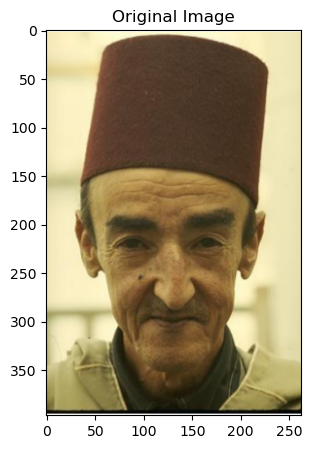

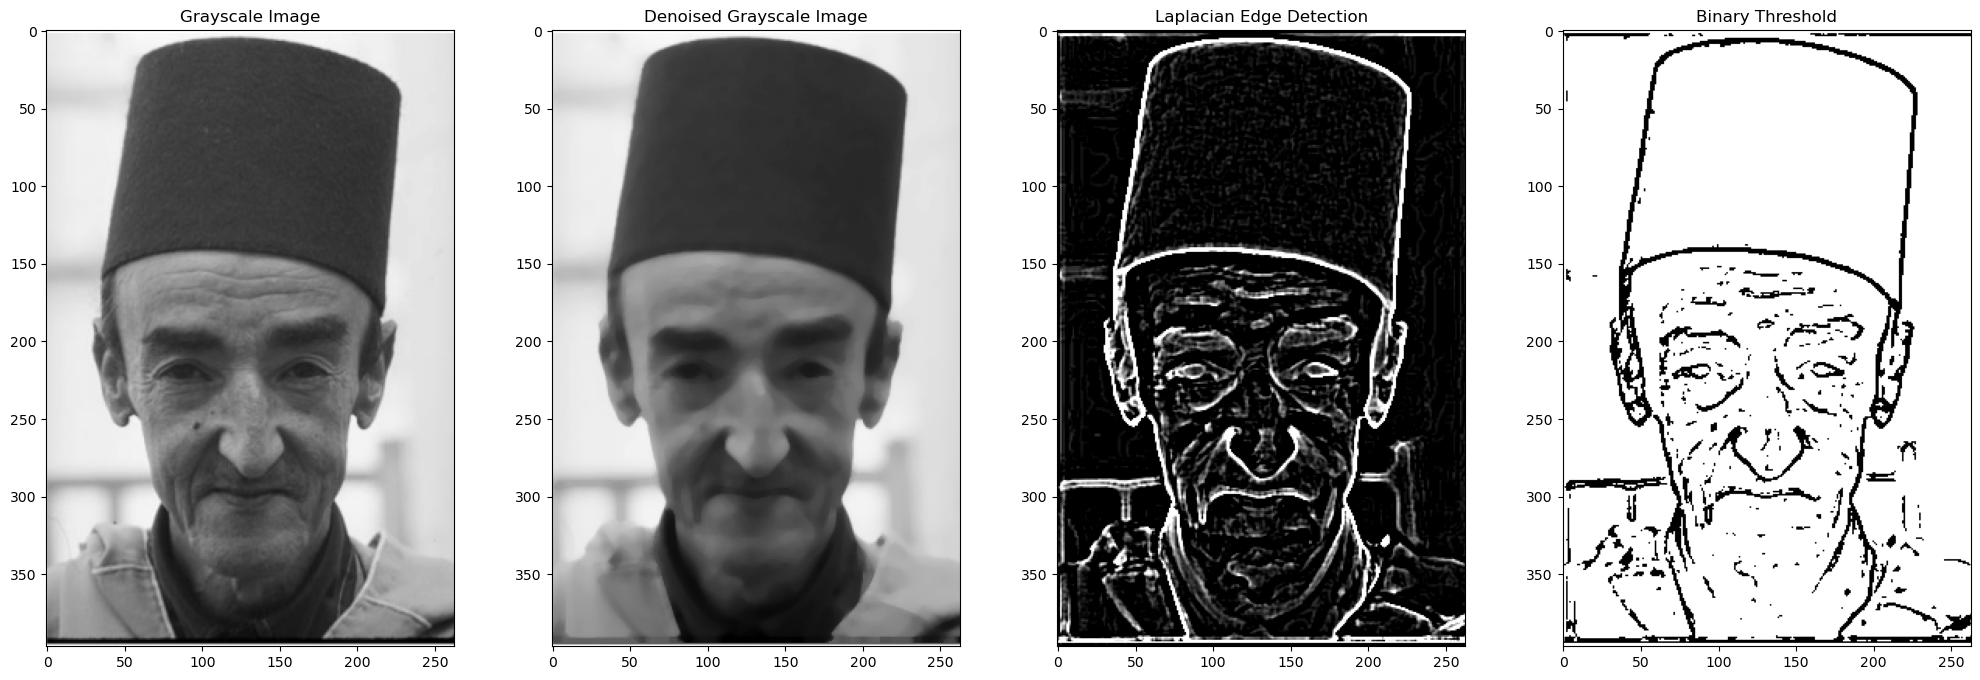

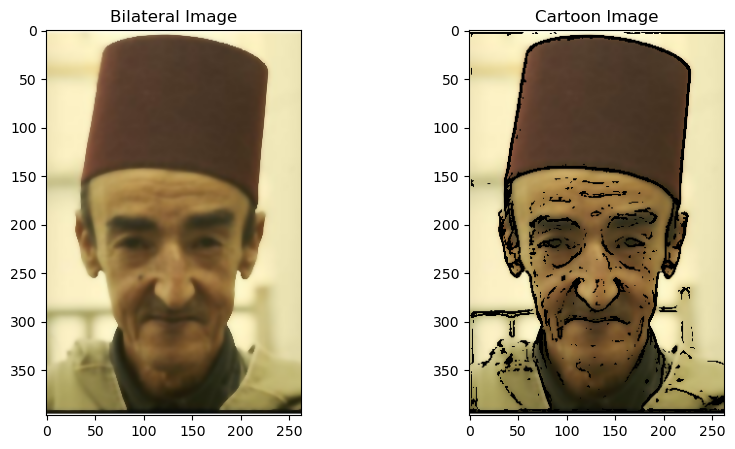

In [9]:
img = cv2.imread('ToBeCartoonified/old_2.png')
edges=find_edges(img)
cartoon=cartoonify(img,edges,color_strength=100,positional_strength=75,size=5,reps=3)

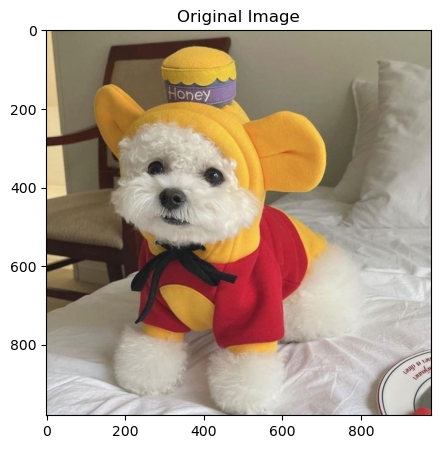

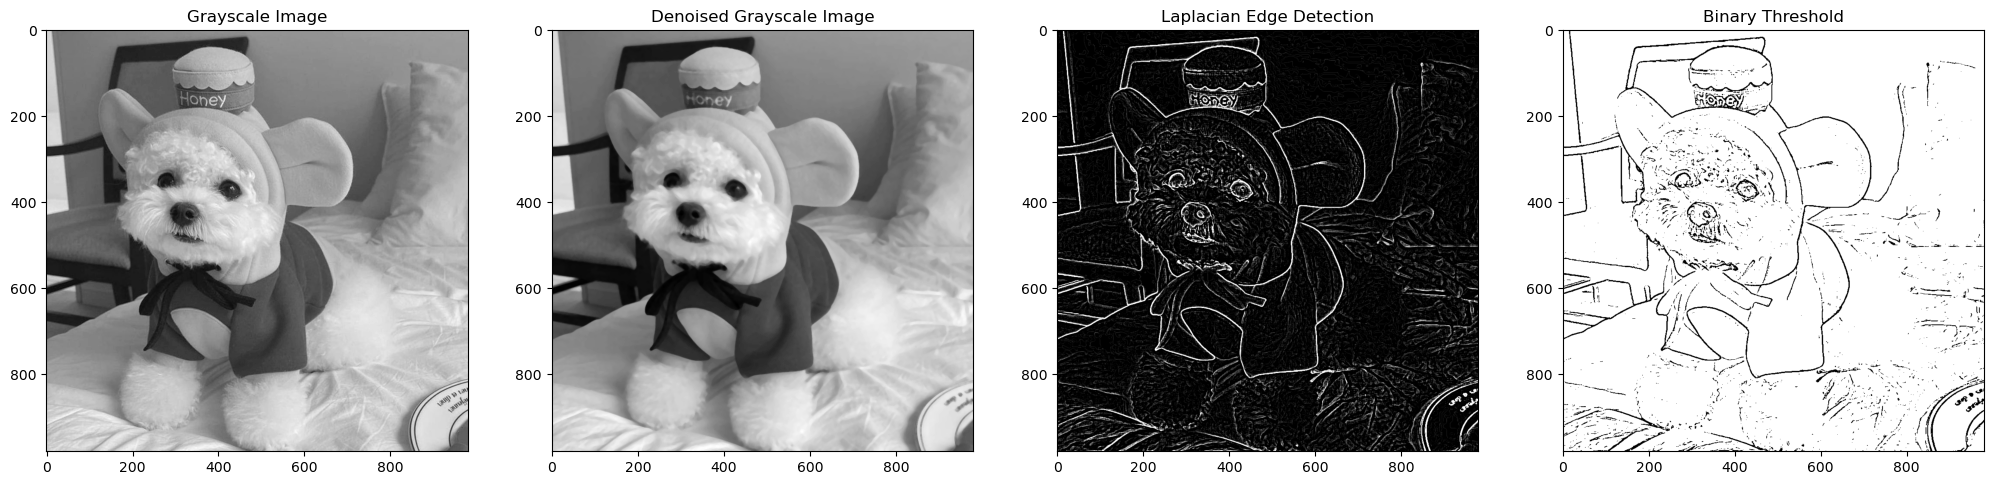

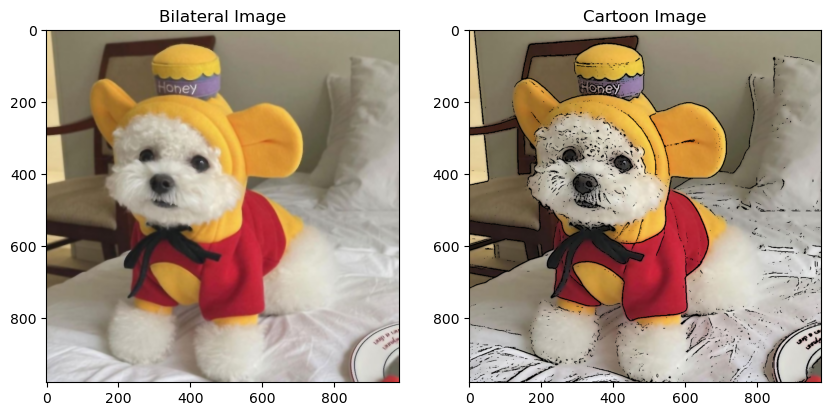

In [10]:
img = cv2.imread('ToBeCartoonified/dog_4.jpg')
edges=find_edges(img)
cartoon=cartoonify(img,edges,color_strength=100,positional_strength=75,size=5,reps=4)

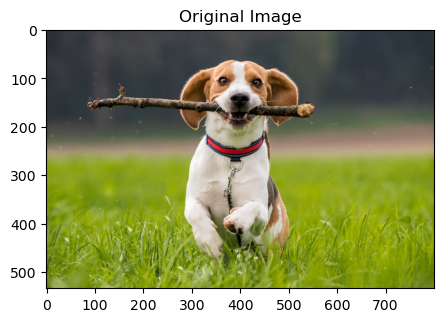

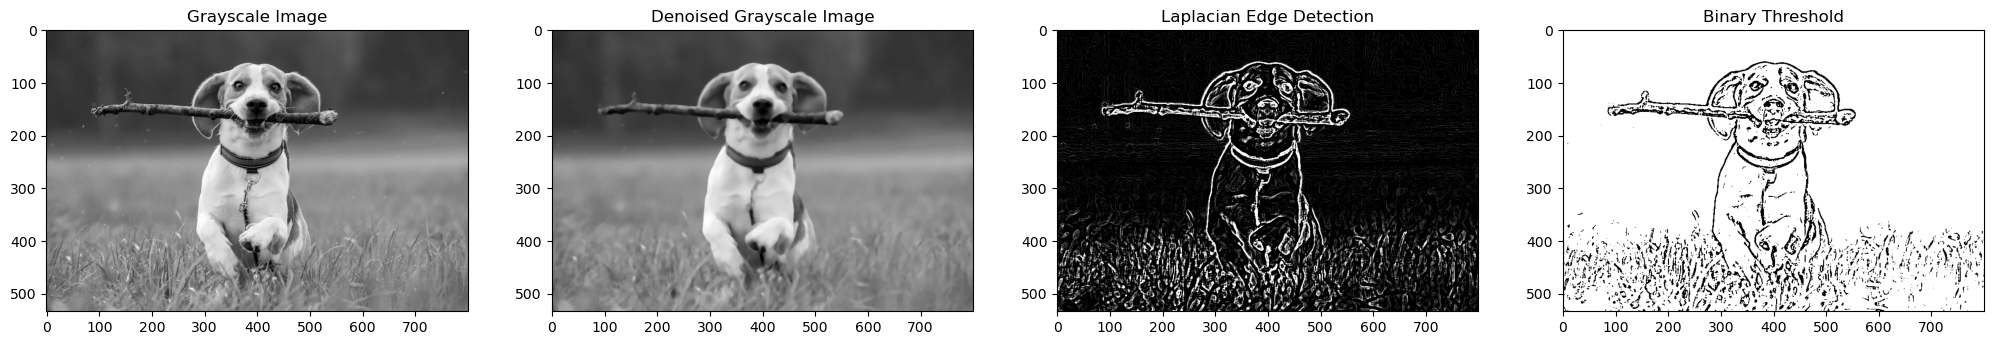

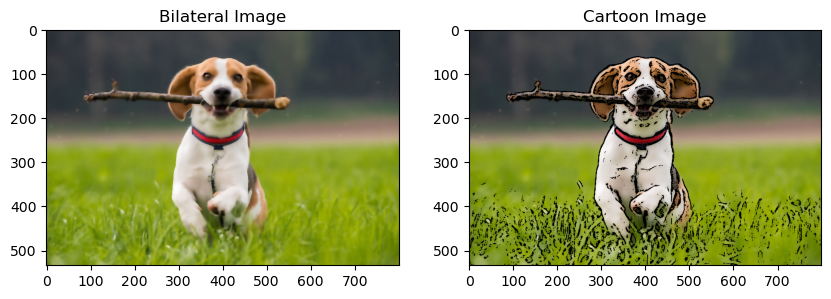

In [11]:
img = cv2.imread('ToBeCartoonified/dog_2.jpg')
edges=find_edges(img)
cartoon=cartoonify(img,edges,color_strength=100,positional_strength=75,size=5,reps=4)

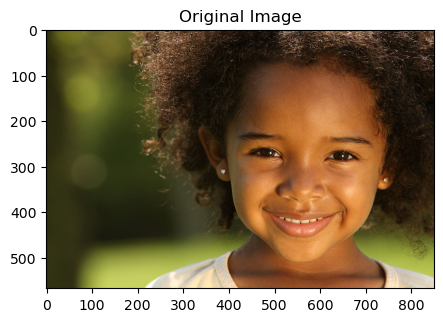

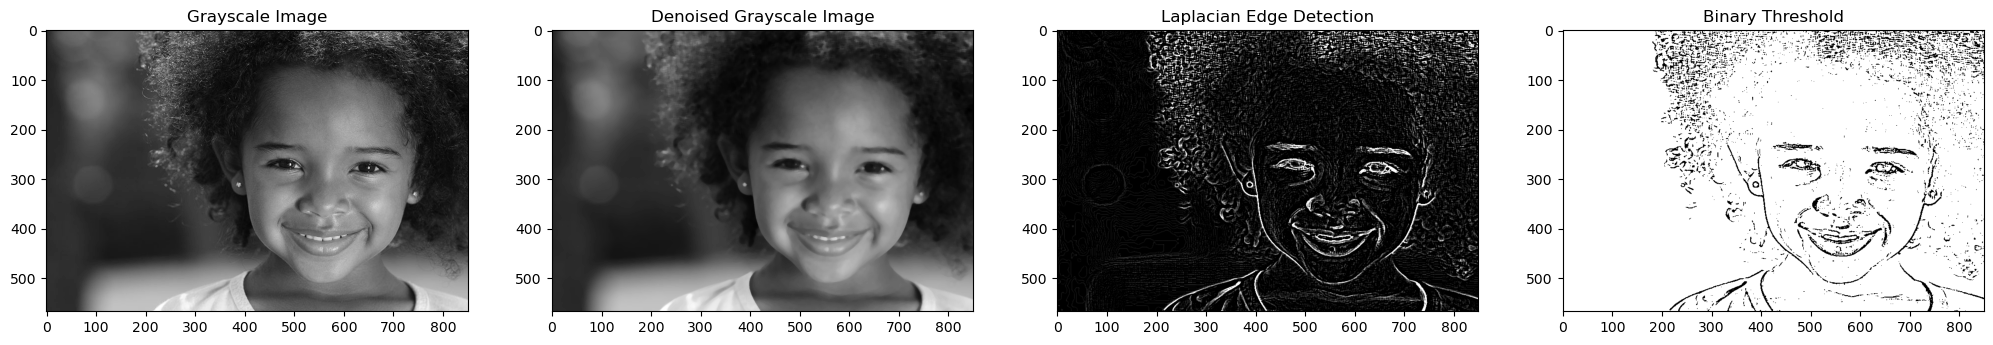

In [12]:
img = cv2.imread('ToBeCartoonified/child_1.jpg')
edges=find_edges(img)
cartoon=cartoonify(img,edges,color_strength=100,positional_strength=75,size=5,reps=4)

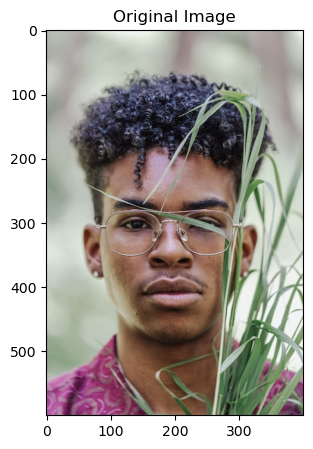

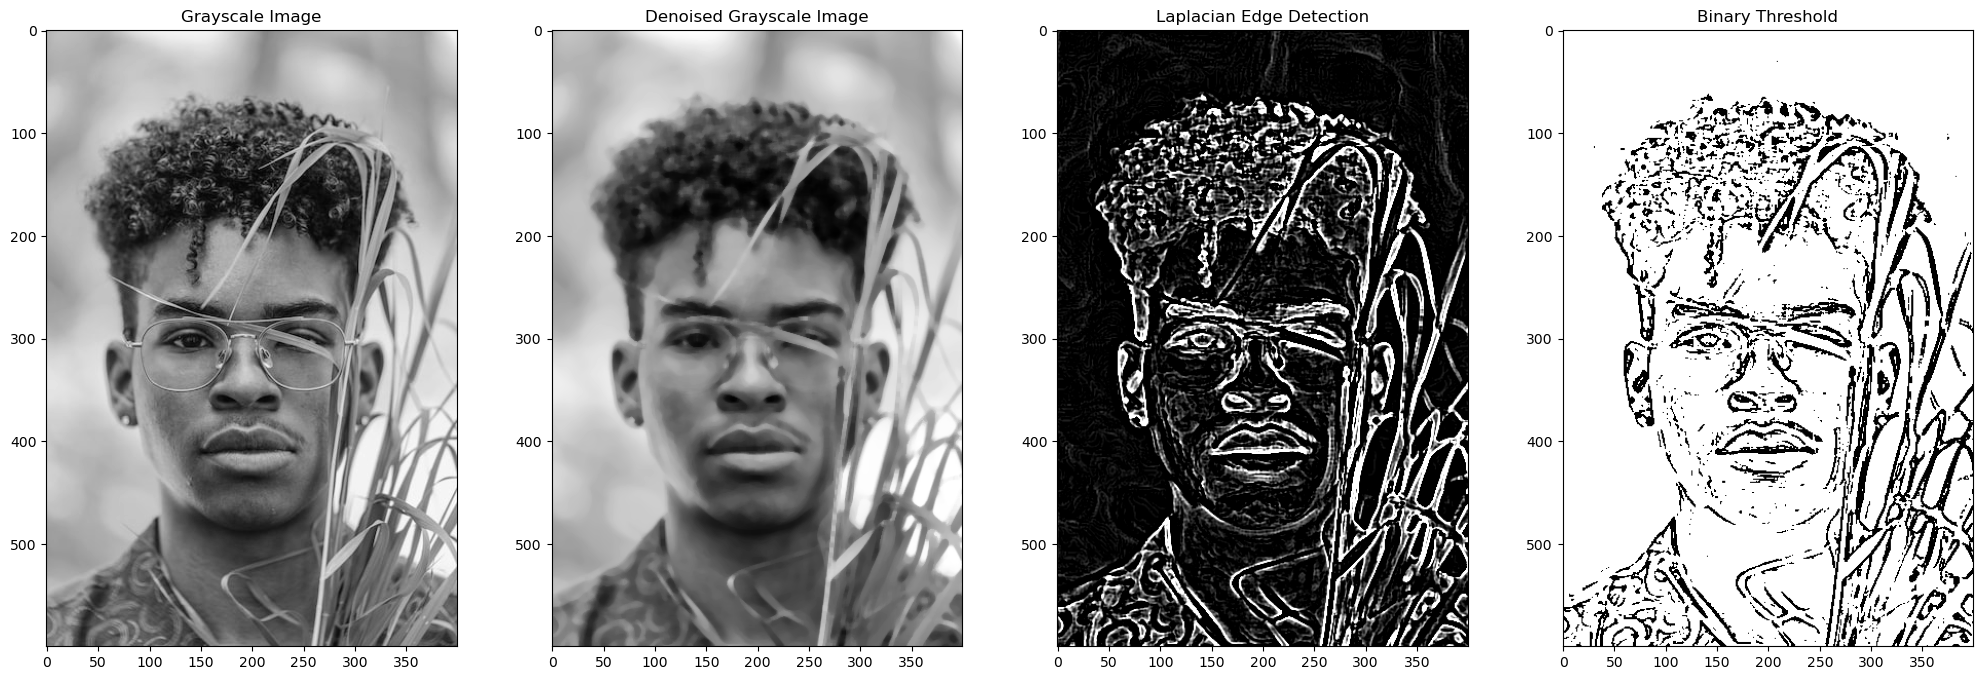

In [13]:
img = cv2.imread('ToBeCartoonified/man_1.jpeg')
edges=find_edges(img)
cartoon=cartoonify(img,edges,color_strength=100,positional_strength=75,size=5,reps=4)

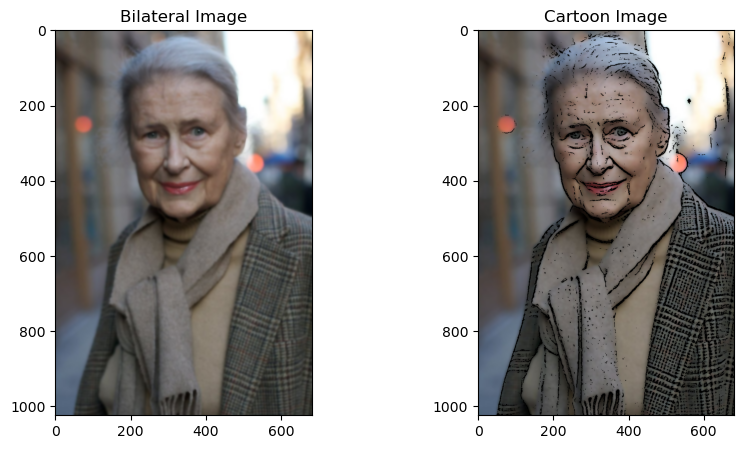

In [14]:
img = cv2.imread('ToBeCartoonified/old_1.jpg')
edges=find_edges(img)
cartoon=cartoonify(img,edges,color_strength=100,positional_strength=75,size=5,reps=4)